# Diabetes Classification Model

## Data Cleaning

In [1]:
# Import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Description of data
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

 - **Pregnancies**: This column tells us how many times a patient has been pregnant.
 - **Glucose**: This column measures the patient's blood sugar level after consuming glucose.
 - **BloodPressure**: This column represents the patient's blood pressure reading, specifically the pressure in the arteries when the heart is at rest. (mm Hg)
 - **SkinThickness**: This column indicates the thickness of the skinfold on the triceps (mm).
 - **Insulin**: This column shows the level of insulin in the patient's blood after a 2-hour period. ((mu U/ml))
 - **BMI**: This column represents the patient's Body Mass Index, which is a measure of body fat based on height and weight.
 - **DiabetesPedigreeFunction**: This column measures the patient's likelihood of having diabetes based on their family history of the disease.
 - **Age**: This column tells us the age of the patient in years.
 - **Outcome**: This column indicates whether the patient has diabetes or not. A value of 1 means they have diabetes, while 0 means they don't.

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
df = diabetes.copy()

In [4]:
# let us find out information about data
df.shape

(768, 9)

In [5]:
df.info()
# No null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
590,11,111,84,40,0,46.8,0.925,45,1
470,1,144,82,40,0,41.3,0.607,28,0
424,8,151,78,32,210,42.9,0.516,36,1
462,8,74,70,40,49,35.3,0.705,39,0
86,13,106,72,54,0,36.6,0.178,45,0
2,8,183,64,0,0,23.3,0.672,32,1
758,1,106,76,0,0,37.5,0.197,26,0
142,2,108,52,26,63,32.5,0.318,22,0
369,1,133,102,28,140,32.8,0.234,45,1
18,1,103,30,38,83,43.3,0.183,33,0


In [7]:
df.duplicated().sum() 

0

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

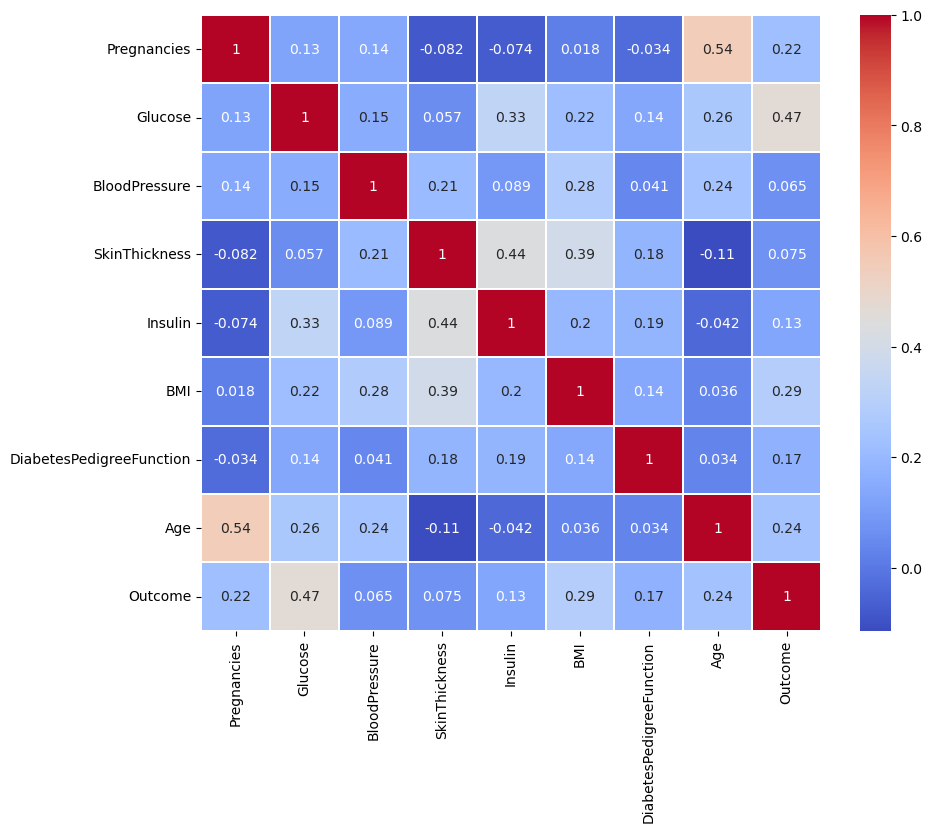

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.1)

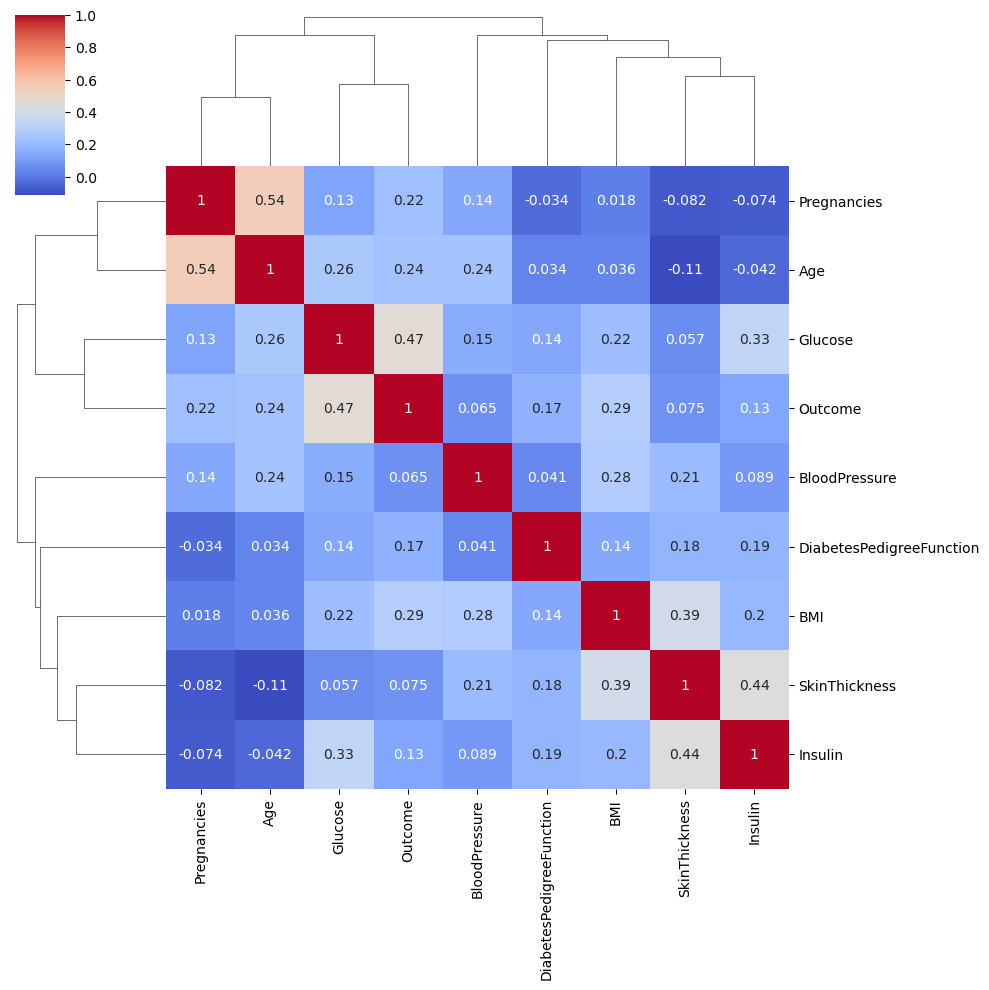

In [10]:
sns.clustermap(data = df.corr(),annot=True,cmap='coolwarm')

    -> All columns are numerical
    -> Age of female and number of times a female is pregnant are moderate positively correlated (which is obvious)
    -> Glucose and Outcome are positively correlated (which may be indicator that glucose is highly contributing in having  diabetes)
    -> BMI and SkinThickness are positively correlated (which is obvious as SkinThickness is responsible in BMI)

In [11]:
a = []
for i in df.columns:
    a.append(df[df[i]==0].shape[0])
pd.Series(a,index=df.columns)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Problems idenified with the data are given below**

  -  Glucose, BloodPressure, SkinThickness, Insulin, BMI columns have values zero which is not possible. May be null values were replaced with zeros
     - Glucose column has **5** rows with zero values   
     - BloodPressure column has **35** rows with zero values
     - SkinThickness column has **227** rows with zero values
     - Insulin column has **374** rows with zero values
     - BMI column has **11** rows with zero values


In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# columns with zeros
columns_with_zeros = ['Insulin', 'SkinThickness', 'BloodPressure','BMI','Glucose']

# replacing zeros with nan
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

# using iterative imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df[columns_with_zeros]), columns=columns_with_zeros)
df_imputed = df_imputed.astype('int64')
df[columns_with_zeros] = df_imputed

In [13]:
pd.DataFrame(data = [diabetes.mean(),df.mean()],index = ['Before Imputation','After Imputation'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Before Imputation,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
After Imputation,3.845052,121.644531,72.355469,28.631510,151.549479,31.993490,0.471876,33.240885,0.348958


## Univariate Analysis

### Checking the distribution of Outcome variable

<Axes: ylabel='Outcome'>

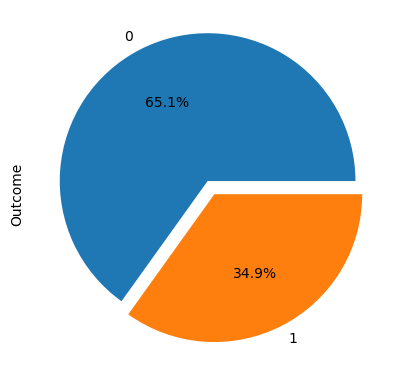

In [14]:
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0])

### Checking The distribution of Independent Varibles

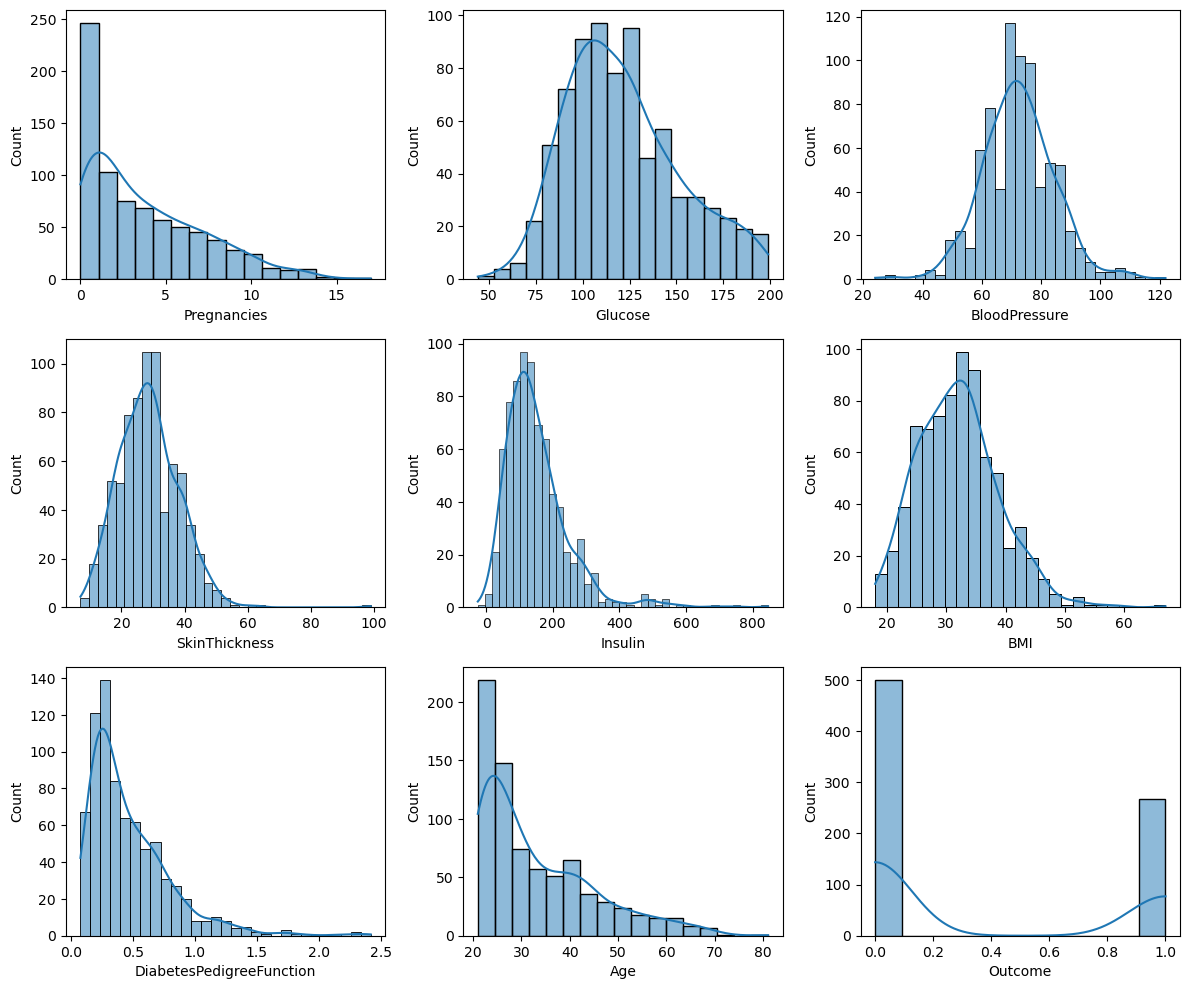

In [15]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column and corresponding axis
for i, (col, ax) in enumerate(zip(df.columns, axes)):
    # Plot the histogram for the current column using seaborn
    sns.histplot(data=df, x=col, ax=ax,kde=True)

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

    -> There are more number of females from 20 to 30 age group in the dataset
    -> Glucose histogram shows normal distribution
    -> The SkinThickness 99 is exceptional and is outlier in the dataset
    -> Insulin column has outliers in range 700 to 800 (but it is possible to have that insulin level so cannot be removed)

## To find Outliers

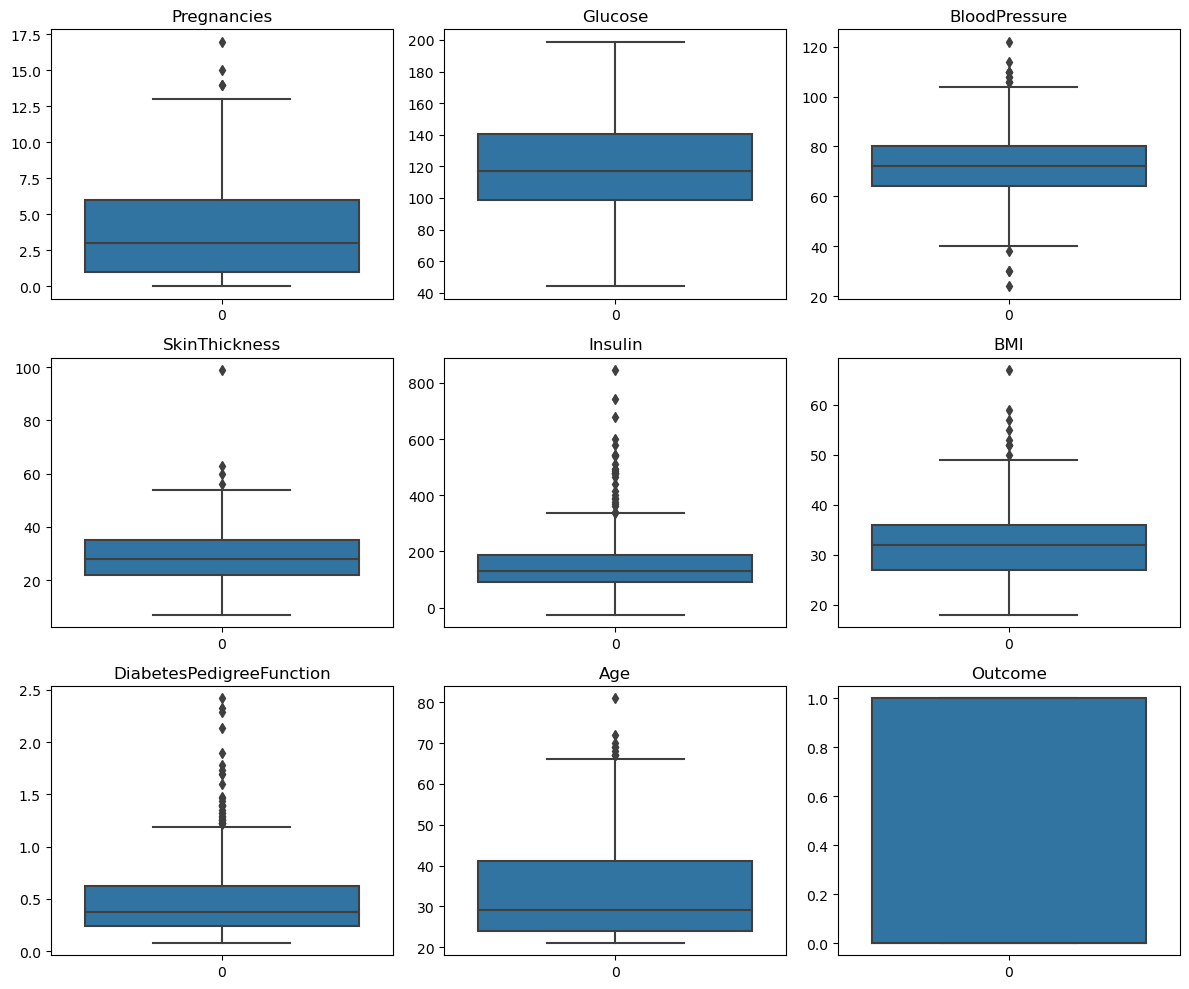

In [16]:

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column and corresponding axis
for i, (col, ax) in enumerate(zip(df.columns, axes)):
    # Plot the boxplot for the current column using seaborn
    sns.boxplot(data=df[col], ax=ax)
    ax.set_title(col)  # Set the title as the column name

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


    -> Since all outliers are possible to have, we cannot remove them

## Bivariate Analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_1020\3198713461.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='Outcome', fill=True, ax=ax)


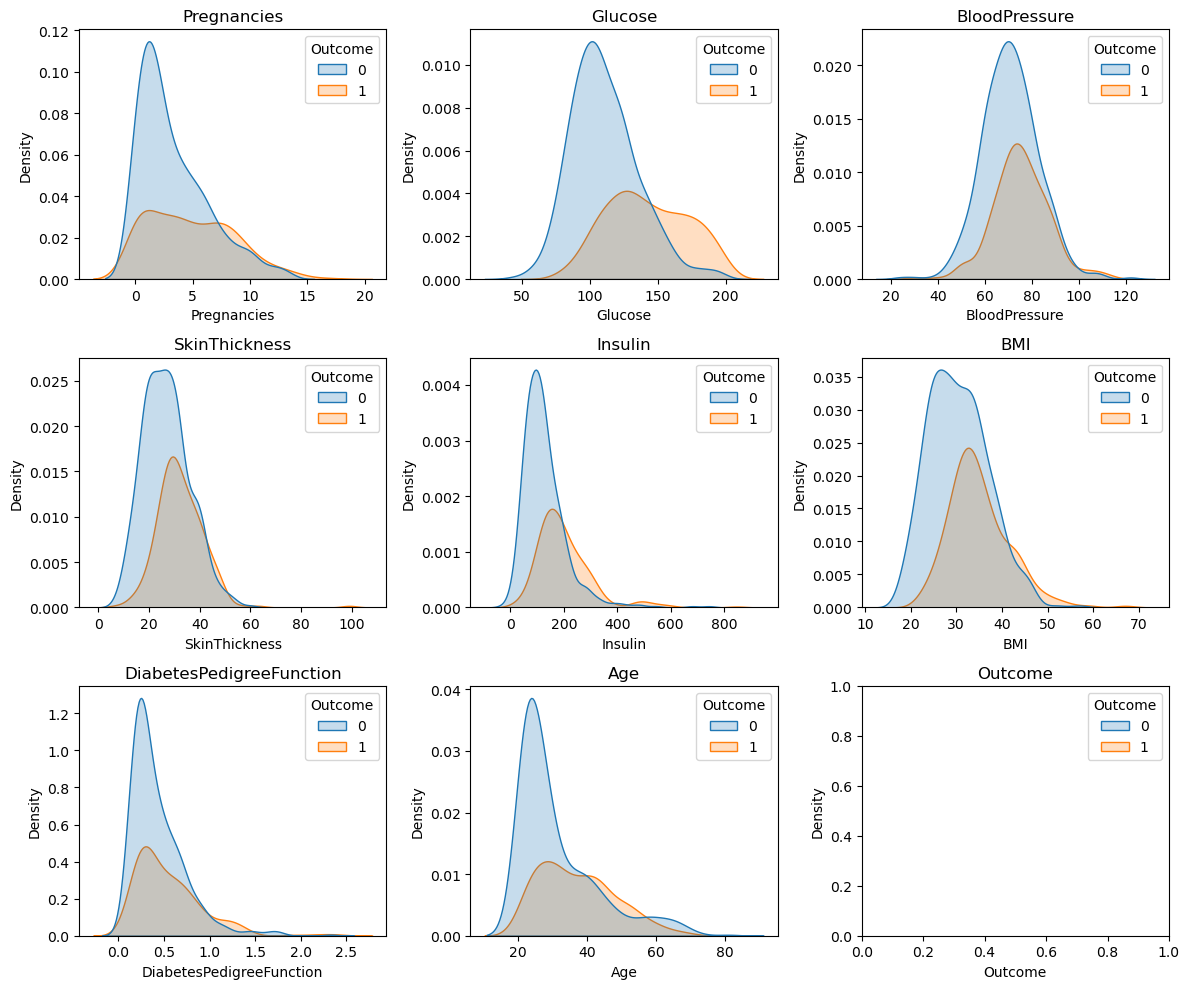

In [17]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column and corresponding axis
for i, (col, ax) in enumerate(zip(df.columns, axes)):
    # Plot the KDE plot for the current column using seaborn with 'hue' parameter
    sns.kdeplot(data=df, x=col, hue='Outcome', fill=True, ax=ax)
    ax.set_title(col)  # Set the title as the column name

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()

    -> There is very high chance of not diagnosing diabetes if the **age** is under **40**
    -> Having blood **pressure** level below **110** decreases the likelihood of having diabetes.
    -> Females with **glucose** levels below **140 mg/dL** have a lower probability of being diagnosed with diabetes.
    -> Females with **insulin** level below **60 mg/dL** have a lower probability of being diagnosed with diabetes.
    -> Females with **SkinThickness** below **25 mm** have a lower probability of being diagnosed with diabetes
    -> **BMI** greater than **40** increases the probability of liklihood of having diabetes

<Figure size 2000x1500 with 0 Axes>

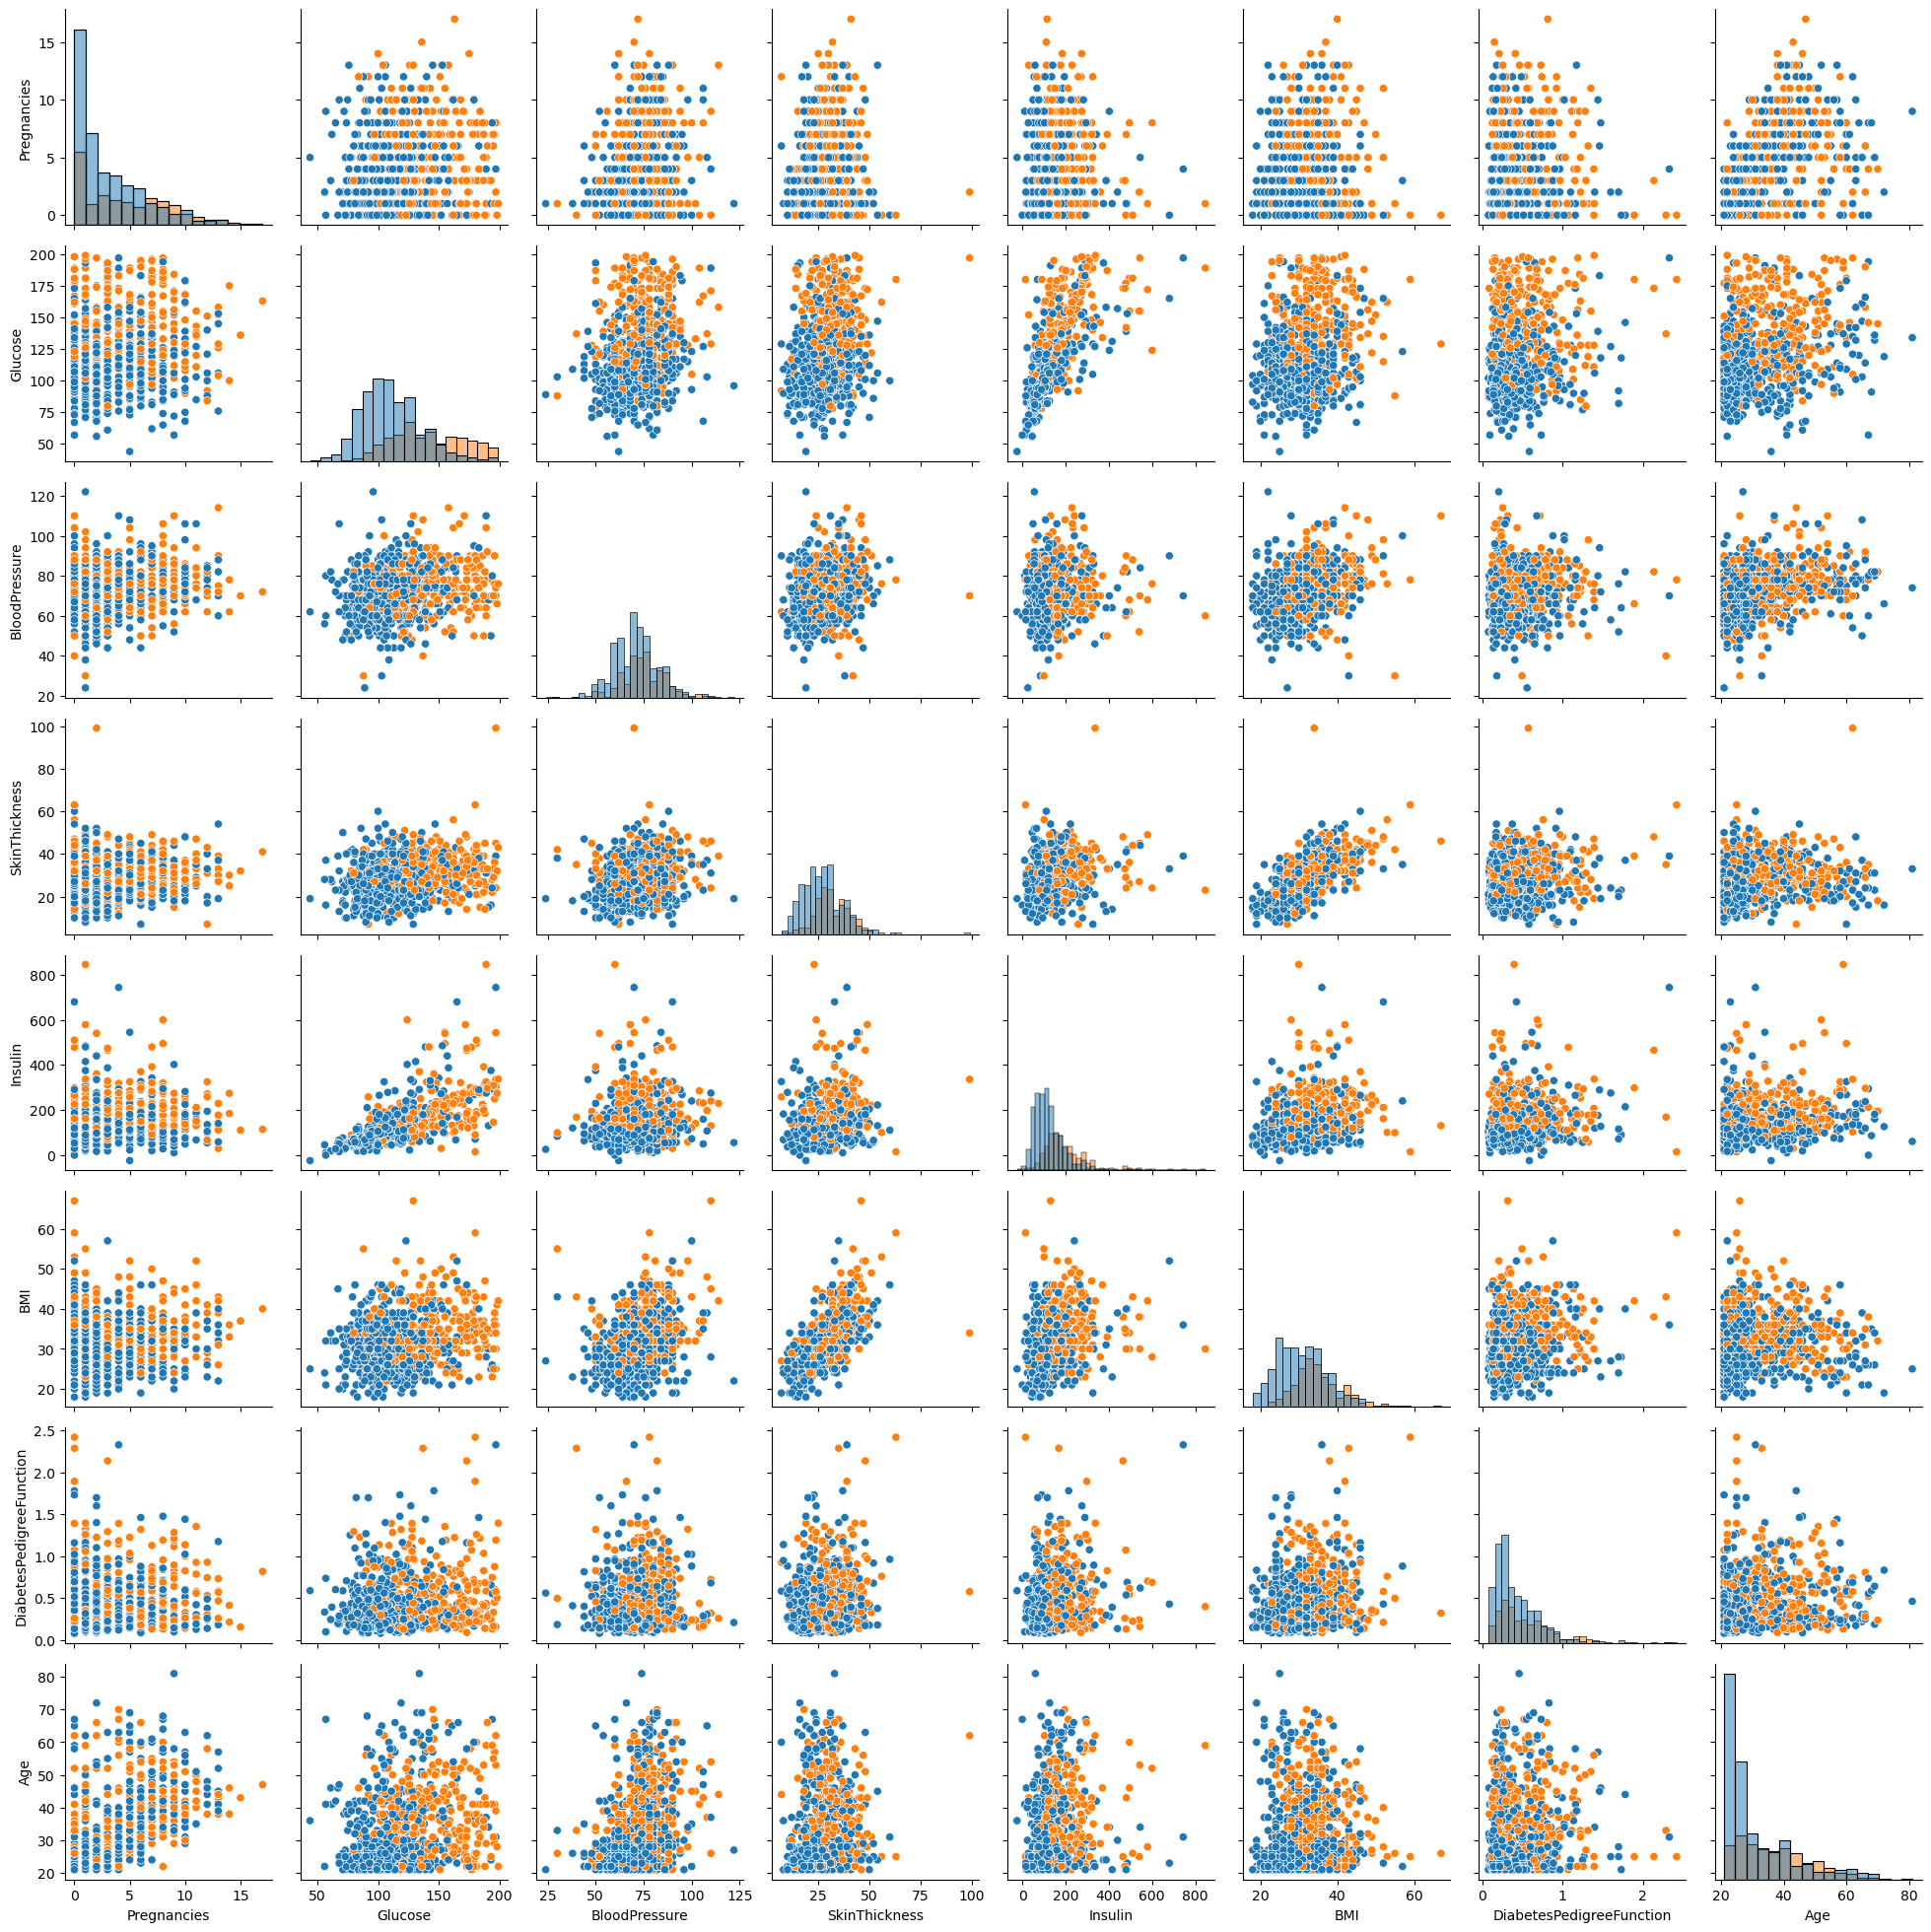

In [18]:
plt.figure(figsize=(20,15))
g = sns.PairGrid(data = df,hue='Outcome')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

    -> From above gridplot we can see that, Glucose, BMI, Age are the most important features contibute in analysis

From the analysis, we can conclude following points:
 - **Pregnancies**: The number of pregnancies does not contribute in diagnosis of diabetes.
 - **Glucose**: After consuming glucose, a normal blood sugar level is below **140 mg/dL**
 - **BloodPressure**: The normal range for blood pressure when the heart is at rest is below **120 mmHg**
 - **SkinThickness**: The normal range for skinfold thickness on the triceps is less than **25 mm**.
 - **Insulin**: After a 2-hour period, normal insulin levels are below **30 µU/mL**
 - **BMI**: The normal range of BMI is 18.5 to 30. The people with greater than **30 BMI** are suffering with obesity which contibutes in diabetes.

**Higher levels of Glucose, BMI and DiabetesPedigreeFunction majorly increase the possibility of having Diabetes**

# Training ML Model

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [26]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [29]:
# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the Decision Tree model on the training data
decision_tree_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



Support Vector Regressor is best model with accuracy 77 percent